## Homework 4
### Cohort 1 Group 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

### Problem 1: AR(p) Processes
 Consider an AR(2) process with $\phi_1 = 1.1$ and $\phi_2 = -0.25$ (following the notation in Lecture 5).
#### (a) 
Plot the autocorrelation function for this process for lags 0 through 20 (see Lecture
5 for itís derivation).

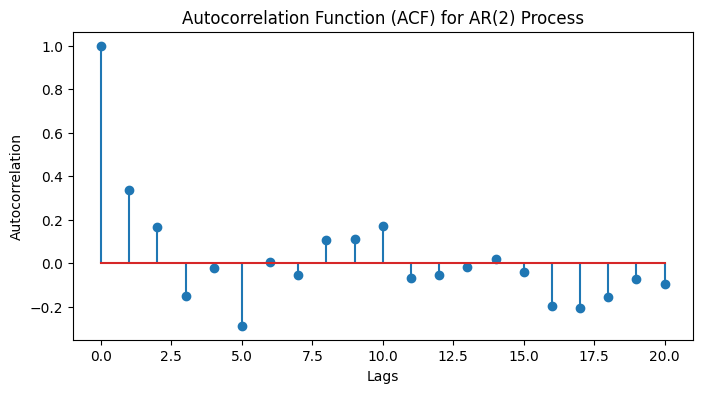

In [2]:
# Parameters of the AR(2) process
phi1 = 1.1
phi2 = -0.25

# Number of lags
lags = 20

# Generate AR(2) process
np.random.seed(1)  # Set a seed for reproducibility
ar_process = [np.random.normal(0, 1)]  # Initial value
for i in range(1, lags + 1):
    ar_process.append(phi1 * ar_process[i-1] + phi2 * ar_process[i-2] + np.random.normal(0, 1))

# Calculate autocorrelation function
acf_values = acf(ar_process, nlags=lags)

# Plot ACF
plt.figure(figsize = (8,4))
plt.stem(range(lags + 1), acf_values)
plt.title("Autocorrelation Function (ACF) for AR(2) Process")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


#### (b) 
Is the process stationary? Explain why or why not.

#### Answer
$p(z) = 1 + 1.1z - 0.25z^2 => z_1 = 2.2 + 2\sqrt{0.21}, z_2 = 2.2 - 2\sqrt{0.21}$. Both roots are real and larger than 1 so this AR(2) process is stationary.

#### (c) 
Give the dynamic multiplier for a shock that occurred 6 periods ago. That is, calculate $$\frac{\partial[r_{t+6}-\mu]}{\partial\varepsilon_t}$$(following the notation in Lecture 5). This requires some algebra.

#### Answer
We have $$\frac{\partial[r_{t+6}-\mu]}{\partial\varepsilon_t} = \phi_1^6 + 5\phi_2\phi_1^4 + 6\phi_2^2\phi_1^2 + \phi_2^3 = 0.3796$$ since it amounts to all combinations of backshift operations which take the term $r_{t+6}$ to $r_t$

#### (d) 
Now, instead, assume 

$\phi_1 = 0.9$ and $ \phi_2 = 0.8.$ Give the dynamic multiplier for a
shock that occurred 6 periods ago. Is the process stationary? Why/why not?

#### Answer
In this case, the CP is $1 - 0.9x - 0.8x^2$ and thus the CP is not stationary since the one root $0 < \frac{\sqrt{401} - 9}{16} < 1$

#### (e)
Instead of analytically solving for dynamic multipliers, we can easily simulate a
full impulse response (that is, dynamic multipliers at all horizons). In particular,
consider a positive shock with magnitude one standard deviation. Assume the
standard deviation is 1 for simplicity. Define $x_t=r_t - \mu$ as in class. Thus:
$$x_t = 1.1x_{t-1}-0.25x_{t-2}+\varepsilon_t$$
Set the initial values equal to the unconditional mean: $x_{t-1} = x_{t_2} = 0$ Set
all future shock equal to their expectations, $\varepsilon_{t+j} = 0$ for all j > 0. As stated
earlier, let shock(t) = 1. Simulate $x_{t+j}$ for $j = 0, ..., 60$  given the above initial values
and sequence of shocks. Plot the resulting series from $x_{t-1}$ through $x_{t+60}$ This is
the Impulse-Response plot for a one standard deviation positive shock to "t.

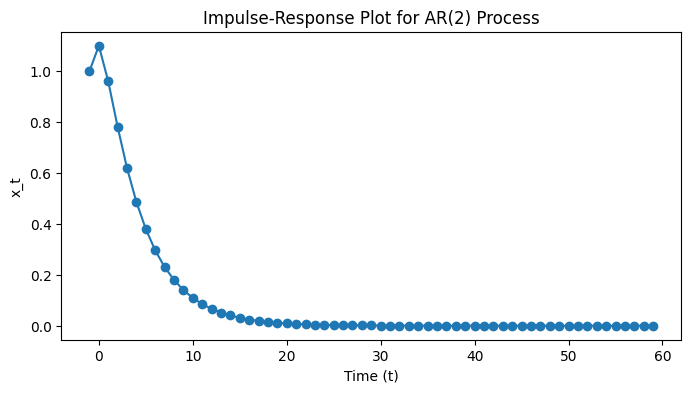

In [3]:
shock_t = 1  # Magnitude of the shock

# Number of periods to simulate
num_periods = 61  # 60 periods after the shock

# Initial conditions
x_t_minus_1 = 0
x_t_minus_2 = 0

# Arrays to store the simulated values
x_values = np.zeros(num_periods)

# Simulate the impulse response
for j in range(num_periods):
    if j:
        x_values[j] = phi1 * x_t_minus_1 + phi2 * x_t_minus_2
    else:
        x_values[j] = phi1 * x_t_minus_1 + phi2 * x_t_minus_2 + shock_t
    # Update values for the next iteration
    x_t_minus_2 = x_t_minus_1
    x_t_minus_1 = x_values[j]

# Plot the Impulse-Response plot
plt.figure(figsize = (8,4))
plt.plot(range(-1, num_periods - 1), x_values, marker='o')
plt.title("Impulse-Response Plot for AR(2) Process")
plt.xlabel("Time (t)")
plt.ylabel("x_t")
plt.show()

### Problem 2: ARMA basics
Consider the ARMA(1,1):
$$y_t =0.95*y_{t-1}-0.9*\varepsilon_{t-1}+\varepsilon_t; $$
where $\varepsilon_t$ is i.i.d. Normal with mean zero and variance $\sigma^2 = 0.05^2$. In the below you need to show your work in order to get full credit.
#### 1)
What is the first-order autocorrelation of $y_t$?

#### Answer
$\rho_1 = \frac{Cov(y_t, y_{t-1})}{\sqrt{Var(y_t)\cdot Var(y_{t-1})}} = \frac{(\phi_1-\theta_1)(1-\phi_1\theta_1)}{1+\theta^2_1-2\phi_1\theta_1} = 0.0725 $

#### 2) 
What is the second-order autocorrelation of $y_t$? Also, what is the ratio of the second-
order to first-order autocorrelation equal to? Give some intuition for this result.

#### Answer
The second order autocorrelation of this ARMA(1,1) model is $\phi_1\rho_1 = 0.0689$ since all $\epsilon_t$ is uncorrelated with $(y_{t-j}-\mu)$ where $j>1$

#### 3)
If $y_t = 0.6$ and $\varepsilon_t = 0.1$, what is (i) $E_t[y_{t+1}]$, (ii) $E_t[y_{t+2}]$ given the ARMA model?

$$E_t[y_{t+1}] = E[0.95 \cdot y_{t} - 0.9 \epsilon_t + \epsilon_{t+1}] = 0.95 \times 0.6 - 0.9 \times 0.1 = 0.48$$
$$E_t[y_{t+2}] = E[0.95 \cdot y_{t+1} - 0.9\epsilon_{t+1} + \epsilon_{t+2}] = 0.95 \times 0.48 = 0.456$$

#### 4)
Let $\hat{x}_t = E_t[y_{t+1}]$ where the expectation is taken using the ARMA model. What is the
unconditional mean, standard deviation, and first-order autocorrelation of $\hat{x}_t$?

#### Answer
The unconditional mean $\mu$ is trivially zero since this ARMA model does not have a constant term to which it reverts to (other than zero).

First off:
$\hat{x_t} = E[y_{t+1} | y_t]$ <br>
$\implies \hat{x_t} = E[0.95 \cdot y_t - 0.9 \cdot \epsilon_t + \epsilon_{t+1}] = 0.95 \cdot y_t - 0.9 \epsilon_t$ <br>
$\implies E[\hat{x_t}] = 0.95 \cdot E[y_t] - 0.9 \cdot E[\epsilon_t] = 0$ <br>
$\implies Var(\hat{x_t}) = E_t[(y_{t+1} - \hat{x_t})^2] = E[(\epsilon_{t+1})^2] = \sigma_{\epsilon}^2$

Its first-order autocorrelation $\rho_1 = E[\hat{x_{t+1}} \cdot \hat{x_t}] = 0.95 \rho_0 - 0.9 \frac{\sigma_\epsilon^2}{\sigma_0} = 0.0712$

### Problem 3: PPI revisited
In PPIFGS.xls from last week's homework you used quarterly data for the Producer Price
Index and estimated an AR(1) on the log growth rate of this series. However, we concluded
from the ACF this is probably not the best forecasting model.
#### 1)
Give the PACF of this series. What might this and the ACF you already calculated
last week tell you about the best ARMA specification?

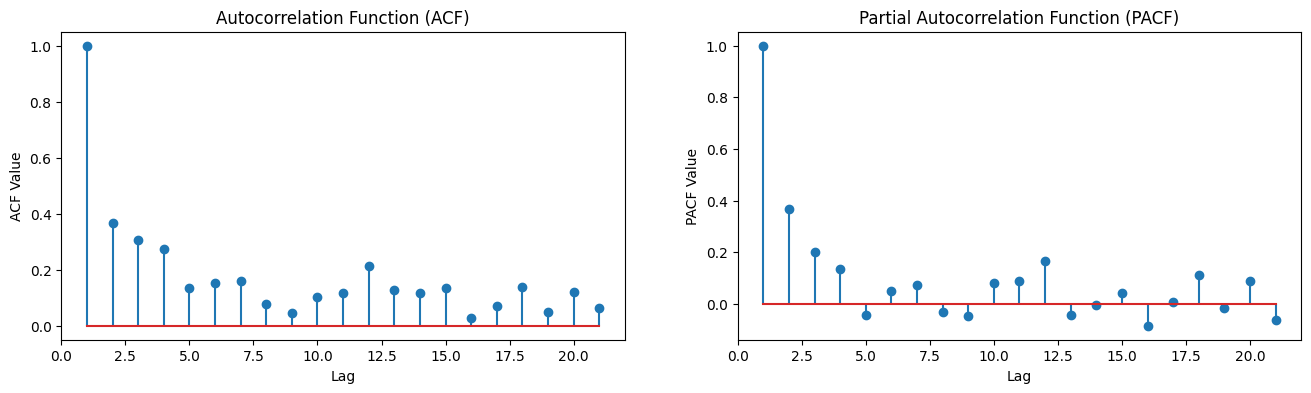

<Figure size 640x480 with 0 Axes>

In [4]:
data = pd.read_excel('PPIFGS.xls')
data.head()

# Assuming 'VALUE' is the column you're interested in
ts_values = np.diff(np.log(data['VALUE']))

# Compute the PACF
lags = 20  # Choose the number of lags you want to compute PACF for
acf_values= acf(ts_values, nlags=lags)
pacf_values= pacf(ts_values, nlags=lags)

# Plot the PACFs
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.stem(range(1, lags+2), acf_values)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.subplot(1, 2, 2)
plt.stem(range(1, lags+2), pacf_values)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF Value')

plt.show()
plt.tight_layout()

#### Answer
From the PACF pic, we can find it cuts off after lag(3), so we can decide AR(3).
From the ACF pic, it cuts off after lag(3), so we can decide MA(3).

#### 2)
Next, you want to try some more complicated ARMA processes. Estimate AR(1),
AR(2), AR(3), ARMA(1,1), ARMA(1,2), and ARMA(1,3). Report the coefficients,
their standard errors, as well as the AIC and BIC values (most packages report these
automatically). Which model(s) is the best model using these information criteria?

In [5]:
# Define a function to fit ARIMA models and print results
def fit_arima(order):
    model = sm.tsa.ARIMA(ts_values, order=order)
    results = model.fit()
    
    print(f"Order: {order}")
    print(pd.DataFrame({'coef':results.params,'se':results.bse}))
    print("AIC:", results.aic, "BIC:", results.bic)
    print("\n")

# Fit and print results for different ARIMA models
fit_arima((1, 0, 0))  # AR(1)
fit_arima((2, 0, 0))  # AR(2)
fit_arima((3, 0, 0))  # AR(3)
fit_arima((1, 0, 1))  # ARMA(1,1)
fit_arima((1, 0, 2))  # ARMA(1,2)
fit_arima((1, 0, 3))  # ARMA(1,3)

Order: (1, 0, 0)
       coef        se
0  0.007280  0.001217
1  0.370665  0.051693
2  0.000147  0.000006
AIC: -1627.3159293388087 BIC: -1616.4875139532537


Order: (2, 0, 0)
       coef        se
0  0.007317  0.001493
1  0.287754  0.059780
2  0.202577  0.034902
3  0.000142  0.000006
AIC: -1636.5701673333674 BIC: -1622.1322801526276


Order: (3, 0, 0)
       coef        se
0  0.007317  0.001783
1  0.267073  0.064014
2  0.158720  0.039563
3  0.138877  0.072694
4  0.000139  0.000005
AIC: -1639.7412779994688 BIC: -1621.693919023544


Order: (1, 0, 1)
       coef        se
0  0.007259  0.002234
1  0.865416  0.054752
2 -0.612097  0.083848
3  0.000140  0.000005
AIC: -1639.9472481174525 BIC: -1625.5093609367127


Order: (1, 0, 2)
       coef        se
0  0.007315  0.001809
1  0.774842  0.097347
2 -0.502534  0.103376
3  0.020755  0.060010
4  0.000140  0.000005
AIC: -1638.421589410064 BIC: -1620.374230434139


Order: (1, 0, 3)
       coef        se
0  0.007316  0.001717
1  0.661443  0.154737
2 -

#### Answer
From the AIC side, ARMA(1,0) is the best one; from the BIC side, ARMA(1,3) is the best one.

### Problem 4: Year-on-year quarterly data and ARMA dynamics
A substantial amount of quantity data, such as earnings, exhibit seasonalities. These
can be hard to model. It is therefore common to use so-called Year-on-Year data (e.g., Q1
earnings vs Q1 earnings a year ago, Q2 earnings vs Q2 earnings a year ago, etc). In this
problem we will see that such a practice can induce MA-terms due to the overlap in the
quarterly year-on-year observations.
Assume the true quarterly log market earnings follow:
$$e_t=e_{t-1} + x_t$$ 
$$x_t = \phi x_{t-1} + \varepsilon_t$$
where $Var(\varepsilon_t)= \sigma_{\varepsilon}^{2} = 1$ and $\varepsilon_t$ is i.i.d. over time t:
The earnings data you are given is year-on-year earnings growth, which in logs is:
$$y_t=e_t-e_{t-4}$$
#### 1)
Assume $\phi=0$. Derive autocovariances of order 0 through 5 for $y_t$. I.e., $Cov(y_t, y_{t-j})$
for j = 0; ...; 5:

#### Answer
As we have $y_t = e_t - e_{t-4} = e_{t-1}+\varepsilon_t - e_{t-4} = \varepsilon_{t}+\varepsilon_{t-1}+\varepsilon_{t-2}+\varepsilon_{t-3}$, we can get: <br>
$Cov(y_t, y_{t}) = 4{\varepsilon}^2$, 
$Cov(y_t, y_{t-1}) = 3{\varepsilon}^2$, 
$Cov(y_t, y_{t-2}) = 2{\varepsilon}^2$ <br>
$Cov(y_t, y_{t-3}) = {\varepsilon}^2$, 
$Cov(y_t, y_{t-4}) = 0$, 
$Cov(y_t, y_{t-5}) = 0$

#### 2)
Assume $\phi= 0$. Determine the number of AR lags and MA lags you need in the
ARMA(p,q) process for yt. Give the associated AR and MA coefficients.

#### Answer
As $y_t - y_{t-1} = \varepsilon_{t}-\varepsilon_{t-4}$, $p=1$ and $q=4$. The model is ARMA(1,4)

#### 3)
Optional: assume 1 > $\phi$ > 0. Repeat 1. and 2. under this assumption.

#### 4)
Use the data on year-on-year (YoY) after-tax US corporate profit growth in
NIPA_corporate_profits.xlsx
and estimate and ARMA(1,3) model. Note that the data is quarterly, overlapping annually, similar to our above setting. Denote the YoY growth as $y_t$. Give the coefficients and their standard errors. Do the coefficient values make sense?

In [6]:
df = pd.read_excel('NIPA_corporate_profits.xlsx')

yoy = df['YoY growth']

model = sm.tsa.ARIMA(yoy, order=(1, 0, 3))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:             YoY growth   No. Observations:                  292
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 324.951
Date:                Sun, 04 Feb 2024   AIC                           -637.902
Time:                        13:50:42   BIC                           -615.842
Sample:                             0   HQIC                          -629.066
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0712      0.017      4.138      0.000       0.037       0.105
ar.L1         -0.0216      0.049     -0.444      0.657      -0.117       0.074
ma.L1          1.0052      0.056     17.838      0.0

In [7]:
ar_params = results.arparams
ma_params = results.maparams

# Combine AR and MA coefficients into a single array
arma_coefficients = np.concatenate([ar_params, ma_params])

# Calculate roots
roots = np.roots(arma_coefficients)
if np.all(np.abs(roots) < 1):
    print("The ARMA model is stable.")
else:
    print("The ARMA model may be unstable.")

The ARMA model may be unstable.


#### Answer
The coefficicent values do not make sense. The three lags of MA are all close to 1 which means history noises have significant influence to now. From a mathematical point of view, the roots are not small than 1 so the process is unstable.


#### 5)
Give the $R_{h}^{2}$
h of the model for forecasting at horizon $h$ by computing $$R_{h}^{2}=\frac{Var(E_t(y_{t+h}))}{Var(y_{t+h})}$$
Let $h = 1, 4$. Discuss your results.

#### Answer
$$R_{1}^{2}=\frac{Var(E_t(y_{t+1}))}{Var(y_{t+1})}=\frac{Var(\phi_{t}y_t)}{Var(y_{t+1})}=\frac{\phi_{t}^2Var(y_t)}{Var(y_{t+1})}=\phi_{t}^2$$
$$R_{4}^{2}=\frac{Var(E_t(y_{t+4}))}{Var(y_{t+4})}=\frac{Var(\phi_{t}^{4}y_t)}{Var(y_{t+4})}=\frac{\phi_{t}^{8}Var(y_t)}{Var(y_{t+4})}=\phi_{t}^{8}$$
Using the fact that variances for $Var(y_t) = Var(y_{t-1}) = Var(y_{t-4})$. Seems like that more lags pass by, less accurate the prediction is assuming stationarity ($\phi < 1$)

### Problem 5: ARMAs and expected and realized returns
Realized returns can be written:
$$r_{t+1} = E_t (r_{t+1}) + \varepsilon_{t+1}$$
where $E_t(\varepsilon_{t+1}) = E(E_t(r_{t+1})\varepsilon_{t+1}) = 0$. That is, a random variable can be decomposed into
its (conditional) expected value plus an innovation term (a shock). To simplify notation,
denote conditional expected returns as $x_t=E_t(r_{t+1})$. Also, assume that xt follows a mean-
zero AR(1), where I am making the mean-zero assumption just to simplify the math to come.
Thus, we have the predictive system:$$r_{t+1} = x_t + \varepsilon_{t+1}$$
$$x_{t+1} = \phi_1 x_t + \eta_{t+1}$$
where $E_t(\eta_{t+1})= E(x_t\eta_{t+1})= 0$.
#### 1)
Assume that $\eta_{t+1}=-\sigma_\eta\varepsilon_{t+1}$, where$\sigma_\eta$> 0. That is, shocks to expected returns are
negatively perfectly correlated with shocks to realized returns. Now, derive the ARMA
process for $r_{t+1}$. Hint: use the above equations at time t and t-1 to substitute out $x_t$
from the first equation. That way you will end up with $r_{t+1}$ on the left hand side (as
now), but only lags of $r_t$ as well as lags of the shock $\varepsilon_t$ and the current short $\varepsilon_{t+1}$ on
the right hand side.

#### Answer
$r_{t+1}=\phi_1 x_{t-1}+\eta_t + \varepsilon_{t+1}=\phi_1 \cdot (r_t-\varepsilon_t)-\sigma_{\eta} \varepsilon_t+\varepsilon_{t+1}$

so $r_{t+1} = \phi_1 r_{t} - (\phi_1+\sigma_{\eta}) \varepsilon_t+\varepsilon_{t+1}$

#### 2)
Optional: Now, assume $\eta_{t+1}$ is a shock term that has arbitrary correlation $\rho$ with $\varepsilon_{t+1}$.
How would you now determine what the appropriate ARMA representation for $r_{t+1}$
is? Hint: derive ACF for $r_{t+1}$ in this more general case and determine what type of
ARMA process matches this ACF.

#### Answer(not sure)
$r_{t+1} = \phi_1 r_{t} - (\phi_1+\sigma_{\eta}) \varepsilon_t+\varepsilon_{t+1}$ <br>
$cov(r_t,r_{t-j}=\phi_1 E[r_{t-1}r_{t-j}]+E[\varepsilon_{t}r_{t-j}]-\phi_1 E[\varepsilon_{t-1}r_{t-j}]+E[\eta_{t-1}r_{t-j}]$ <br>
When $j=1$, we have $r_{t-1}=x_{t-2}+\varepsilon_{t-1}$. And we know $E[x_{t-2}\varepsilon_{t-1}]=E[x_{t-2}\eta_{t-1}]=0$ <br>
So $\rho_1=\phi_1-\frac{\phi \sigma^2_{\varepsilon}-\rho \sigma_{\varepsilon} \sigma_{\eta} }{var{r_t}}$, $\rho_j=\phi_1 \rho_{j-1}$, when $j>1$
It is ARMR(1,1)